# WHITE NOISE

## Import relevant packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

## Loading and Transforming the data

In [2]:
raw_csv_data = pd.read_csv("/content/Index2018.csv")
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method="ffill")

## Removing Surplus Data

In [3]:
df_comp['market_value'] = df_comp.spx

In [4]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.80)
df,df_test = df_comp.iloc[:size],df_comp.iloc[size:]


## White Noise

In [9]:
wn = np.random.normal(loc = df.market_value.mean(),scale = df.market_value.std(), size = len(df))

In [10]:
df['wn'] = wn

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1095.781447
std,292.559287,290.488518
min,438.920000,22.217338
25%,914.620000,899.218483
50%,1144.650000,1098.957670
75%,1316.280729,1296.995405
max,1570.252238,2041.752776


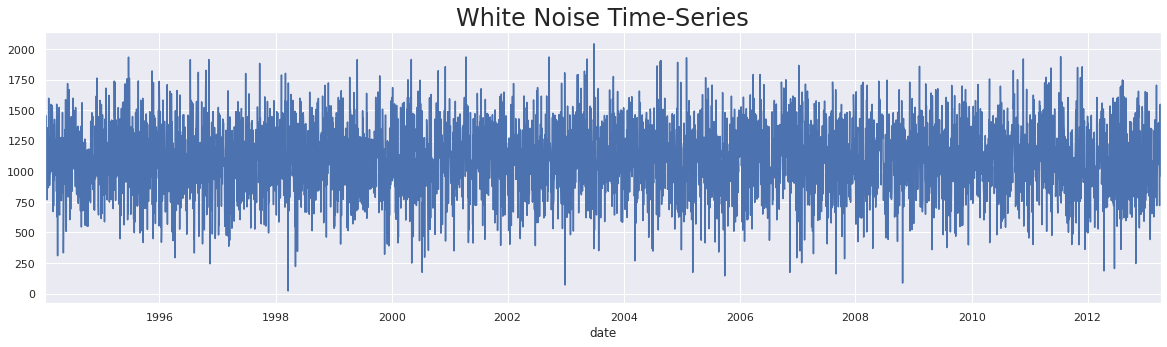

In [12]:
df.wn.plot(figsize=(20,5))
plt.title("White Noise Time-Series",size=24)
plt.show()

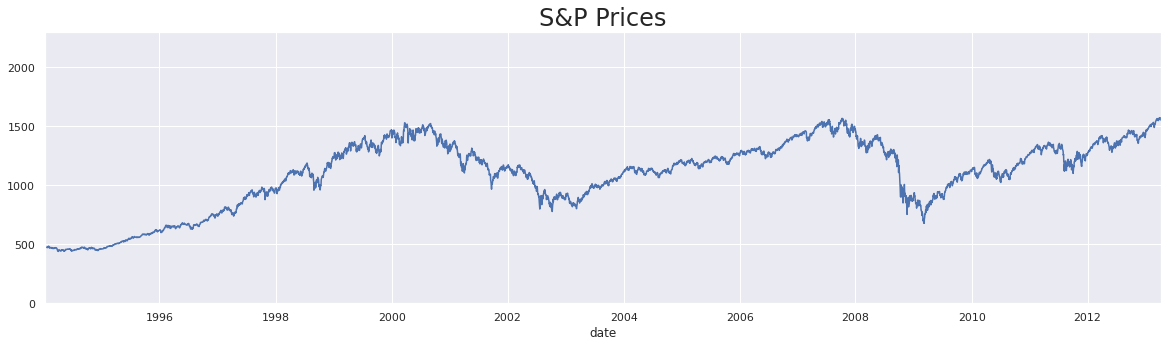

In [14]:
df.market_value.plot(figsize=(20,5))
plt.title("S&P Prices",size=24)
plt.ylim(0,2300)
plt.show()

# RANDOM WALK

In [15]:
rw = pd.read_csv("/content/RandWalk.csv")

In [16]:
rw.date = pd.to_datetime(rw.date, dayfirst= True)
rw.set_index("date",inplace=True)
rw = rw.asfreq('b')

In [17]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [19]:
df['rw'] = rw.price

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,1320.351011,1122.139662
1994-01-10,475.27,1500.486350,1080.347860
1994-01-11,474.13,1477.531965,1082.095245
1994-01-12,474.17,970.263876,1083.639265
1994-01-13,472.47,1206.145554,1067.146255


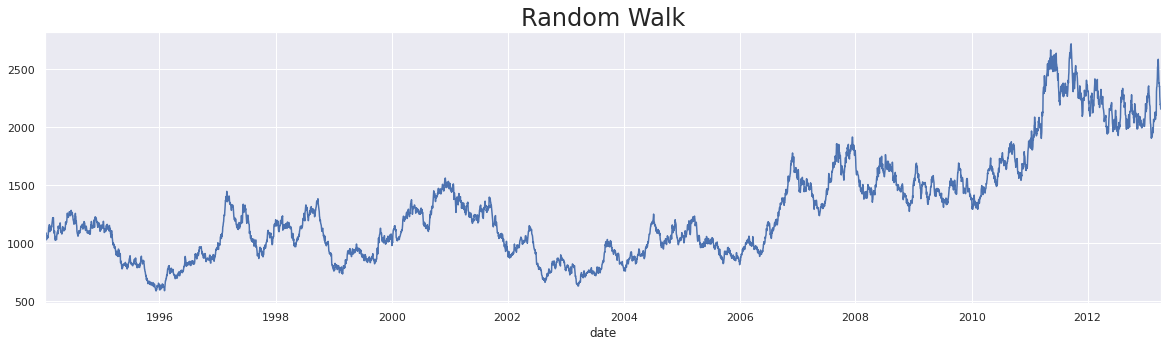

In [21]:
df.rw.plot(figsize=(20,5))
plt.title("Random Walk",size=24)
plt.show()

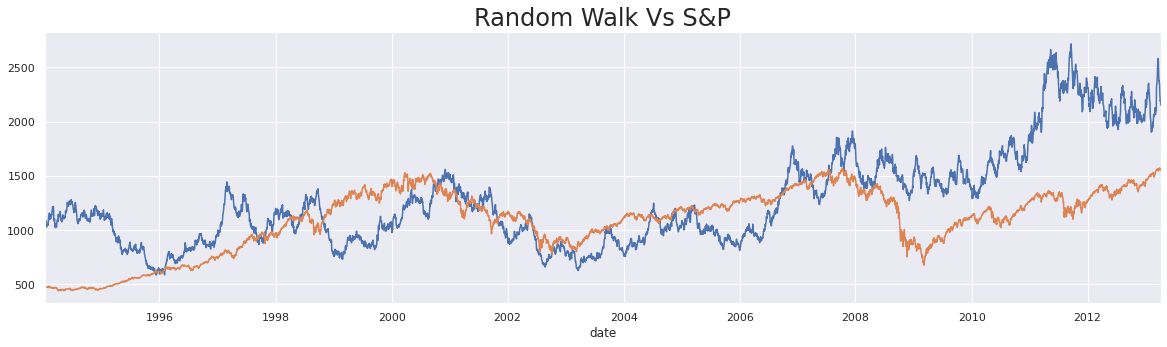

In [22]:
df.rw.plot(figsize=(20,5))
df.market_value.plot()
plt.title("Random Walk Vs S&P",size=24)
plt.show() 

# Stationarity

In [23]:
sts.adfuller(df.market_value) 

(-1.736984745235244,
 0.41216456967706194,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [24]:
sts.adfuller(df.wn)

(-39.2623705452356,
 0.0,
 2,
 5018,
 {'1%': -3.4316538358533277,
  '5%': -2.8621161549128313,
  '10%': -2.567076687880585},
 70746.89295131716)

In [25]:
sts.adfuller(df.rw)

(-1.3286073927689706,
 0.615984918161739,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

# Seasonality

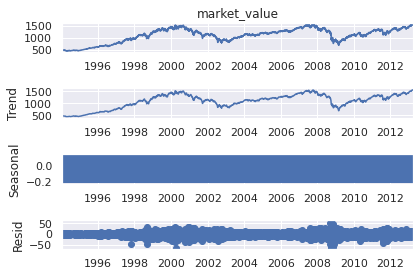

In [26]:
s_dec_additive = seasonal_decompose(df.market_value, model ="additive")
s_dec_additive.plot()
plt.show()

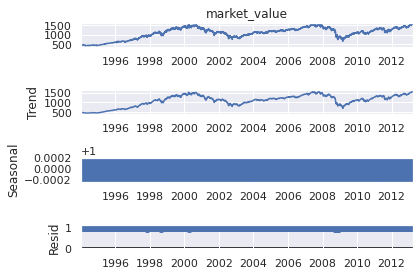

In [27]:
s_dec_multiplicative = seasonal_decompose(df.market_value, model ="multiplicative")
s_dec_multiplicative.plot()
plt.show()  

# Autocorrelation

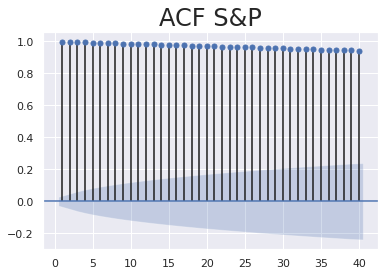

In [29]:
sgt.plot_acf(df.market_value,lags= 40, zero=False)
plt.title("ACF S&P", size=24)
plt.show()

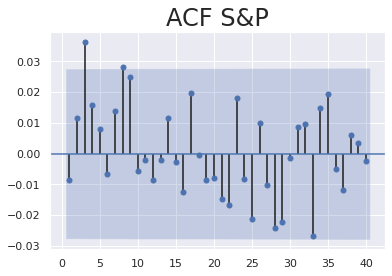

In [30]:
sgt.plot_acf(df.wn,lags= 40, zero=False)
plt.title("ACF WN", size=24)
plt.show()

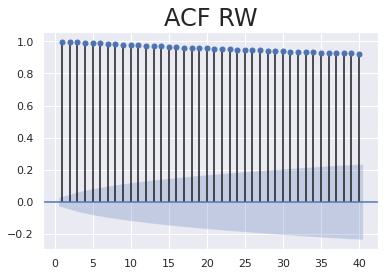

In [32]:
sgt.plot_acf(df.rw,lags= 40, zero=False)
plt.title("ACF RW", size=24)
plt.show()

# Partial Autocorrelation

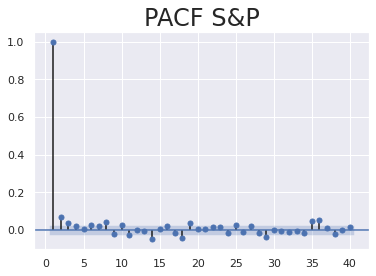

In [33]:
sgt.plot_pacf(df.market_value,lags= 40, zero=False,method=('ols'))
plt.title("PACF S&P", size=24)
plt.show()

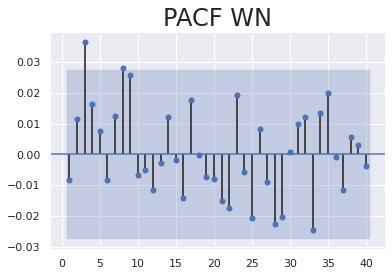

In [35]:
sgt.plot_pacf(df.wn,lags= 40, zero=False,method=('ols'))
plt.title("PACF WN", size=24)
plt.show()

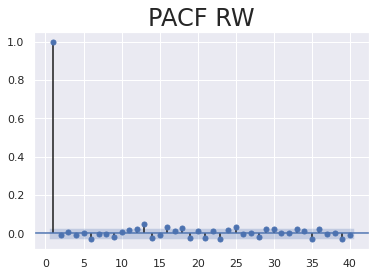

In [37]:
sgt.plot_pacf(df.rw,lags= 40, zero=False,method=('ols'))
plt.title("PACF RW", size=24)
plt.show()